<a href="https://colab.research.google.com/github/NijjohUnno/KCB-Data-Science-Hackathon/blob/main/KCB_Data_Science_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Prediction Model **

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load Data
telco_df = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

#Print first five rows
print(telco_df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Column names and data types
print(telco_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Summary statistics for numerical columns
print(telco_df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


Senior Citizen column is categorical

In [ ]:
#Converting Senior Citizen column to categorical

telco_df['SeniorCitizen'] = telco_df['SeniorCitizen'].astype('object')

# Explore unique values and counts for the senior Citizens
print(telco_df['SeniorCitizen'].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [ ]:
# Check for missing values
print(telco_df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


The Dataset contains no missing values.

In [ ]:
# Convert 'Churn' column to 0 or 1
telco_df = telco_df.replace({'Churn': {'Yes': 1, 'No': 0}})
print(telco_df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [ ]:
# churn label distribution
print(telco_df['Churn'].value_counts())  # Check the distribution of churn labels

Churn
0    5174
1    1869
Name: count, dtype: int64


**Visualization**

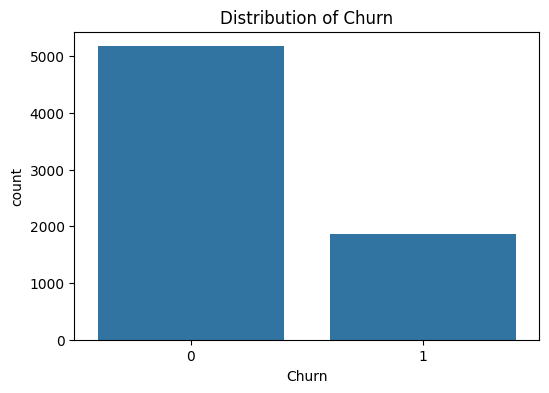

In [ ]:
# Distribution of churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=telco_df)
plt.title('Distribution of Churn')
plt.show()

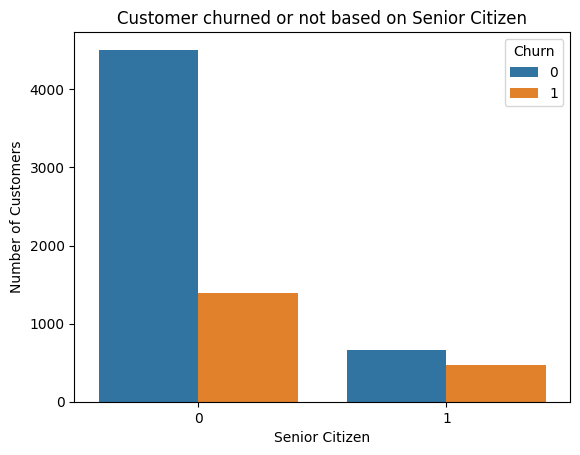

In [ ]:
sns.countplot(data=telco_df,x='SeniorCitizen',hue='Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Customers')
plt.title('Customer churned or not based on Senior Citizen')
plt.show()

Senior citizens are more likely to churn.


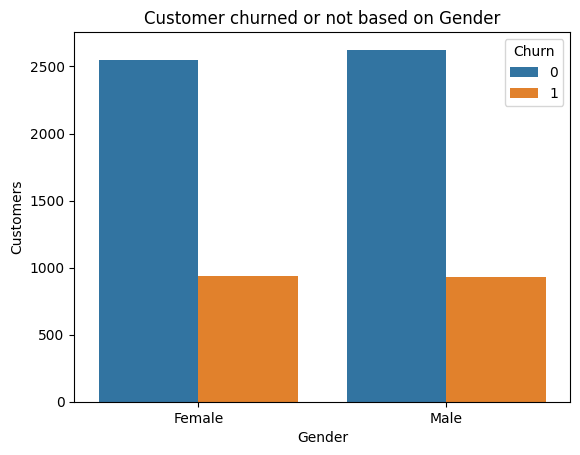

In [ ]:
sns.countplot(data=telco_df,x='gender',hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customer churned or not based on Gender')
plt.show()

Churn is independent of Gender.

**Fitting a classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Drop Customer ID and Gender columns
X = telco_df[[
    'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
]]
y = telco_df['Churn']
print(X.shape, y.shape)


(7043, 18) (7043,)


**Prediction**

In [ ]:
#split Data into Train and Test
from sklearn.model_selection import train_test_split

# encoding categorical variables
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

#test_size 30% of data for testing...random sets seed for random number generator same number produces exact split
#stratify

knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)

#Accuracy
print(knn.score(X_test, y_test))

0.7931850449597728


In [ ]:
import numpy as np

train_accuracies = {}
test_accuracies = {}

neighbors =np.arange(1,26)
for neighbor in neighbors:
  knn =KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)


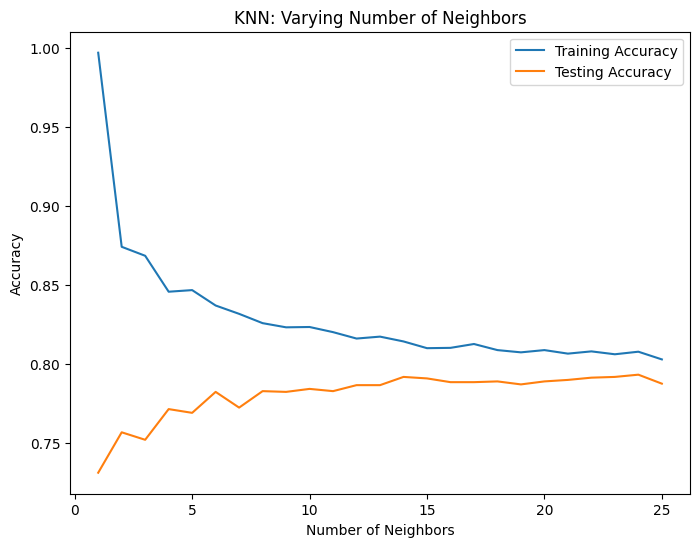

In [ ]:
#Visualizing model Complexity

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()